In [ ]:
!pip install gymnasium gym_anytrading

   ---------------------------------------- 0.0/965.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/965.4 kB ? eta -:--:--
   --------------------- ------------------ 524.3/965.4 kB 2.4 MB/s eta 0:00:01
   ---------------------------------------- 965.4/965.4 kB 2.4 MB/s eta 0:00:00


In [ ]:
!pip install gym gym_anytrading

     ---------------------------------------- 0.0/721.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/721.7 kB ? eta -:--:--
     -------------- ------------------------- 262.1/721.7 kB ? eta -:--:--
     -------------------------------------- 721.7/721.7 kB 1.8 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for gym: filename=gym-0.26.2-py3-none-any.whl size=827632 sha256=6775c87d4336c5e0c2e9850b6af4125bbeca225485ae9dc16344129dad8ca476
  Stored in directory: c:\users\shreyash verma\appdata\local\pip\cache\wheels\17\79\65\7afedc162d858b02708a3b8f7a6dd5b1000dcd5b0f894f7cc1
Successfully built gym


In [ ]:
!pip install stable-baselines3

In [ ]:
!pip install alpha_vantage
!pip install yfinance

  Using cached multitasking-0.0.11-py3-none-any.whl.metadata (5.5 kB)
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     --- ------------------------------------ 0.3/3.0 MB ? eta -:--:--
     ------ --------------------------------- 0.5/3.0 MB 1.2 MB/s eta 0:00:03
     ---------- ----------------------------- 0.8/3.0 MB 1.3 MB/s eta 0:00:02
     ----------------- ---------------------- 1.3/3.0 MB 1.7 MB/s eta 0:00:01
     --------------------------- ------------ 2.1/3.0 MB 2.2 MB/s eta 0:00:01
     ---------------------------------- ----- 2.6/3.0 MB 2.3 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 2.5 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.t

In [ ]:
!pip install alpaca-trade-api

  Using cached deprecation-2.1.0-py2.py3-none-any.whl.metadata (4.6 kB)
Using cached deprecation-2.1.0-py2.py3-none-any.whl (11 kB)
  Attempting uninstall: websockets
    Found existing installation: websockets 13.1
    Uninstalling websockets-13.1:
      Successfully uninstalled websockets-13.1
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.2.2
    Uninstalling urllib3-2.2.2:
      Successfully uninstalled urllib3-2.2.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.13.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 5.28.3 which is incompatible.
tensorflow-intel 2.13.0 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.12.2 which is incompatible.


In [ ]:
!pip install ta

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29422 sha256=55f73d0942cb985636f48951c3d83a23d0e15a94df959bb6987e388308722a51
  Stored in directory: c:\users\shreyash verma\appdata\local\pip\cache\wheels\b1\8e\55\64e87f8cc064571b0096ff2e5f32a4d29e444705f33b361a3d
Successfully built ta


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import time
import gym
import gym_anytrading
from collections import deque
from typing import Dict, List, Tuple, Union

In [ ]:
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C, PPO  # Note: PPO2 is just PPO in stable-baselines3

In [ ]:
# Real-time data and trading connections
import alpaca_trade_api as alpaca
from alpha_vantage.timeseries import TimeSeries
import yfinance as yf


In [ ]:
# Data preprocessing and technical indicators
import ta
from sklearn.preprocessing import StandardScaler

# Portfolio optimization
import scipy.optimize as sco


In [ ]:
from datetime import time as dt_time
import time  # the module


In [ ]:
# At the top of your file, ensure these imports are present
from datetime import datetime, timedelta, timezone, time

In [ ]:
# Configuration
class Config:
    """Configuration settings for the portfolio management system."""

    # Trading parameters
    SYMBOLS = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'META']  # Assets to include in portfolio
    LOOKBACK_WINDOW = 30  # Number of days to use for features
    UPDATE_INTERVAL = 60  # Seconds between model updates
    TRADING_HOURS = {'start': '09:30', 'end': '16:00'}  # Market hours (Eastern Time)

    # Portfolio parameters
    INITIAL_CAPITAL = 100000  # Starting capital
    MAX_POSITION_SIZE = 0.2  # Maximum allocation to a single asset
    RISK_FREE_RATE = 0.03  # Risk-free rate for portfolio optimization
    TARGET_VOLATILITY = 0.15  # Target portfolio volatility

    # Model parameters
    TRAIN_TEST_SPLIT = 0.8  # Fraction of data for training
    RETRAIN_FREQUENCY = 7  # Days between model retraining

    # API credentials
    ALPACA_API_KEY = ""
    ALPACA_API_SECRET = ""
    ALPACA_BASE_URL = ""  # Paper trading
    ALPHA_VANTAGE_API_KEY =  ""

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
from alpha_vantage.timeseries import TimeSeries
import alpaca_trade_api as alpaca
from datetime import datetime, timedelta, timezone, time


class DataHandler:
    def __init__(self, config):
        self.config = config
        self.symbols = config.SYMBOLS
        self.lookback_window = config.LOOKBACK_WINDOW
        self.historical_data = {}
        self.features = {}

        # Set to False to use real data
        self.use_simulated_data = False

        # Initialize API connections and load data
        self._initialize_apis()
        self._load_historical_data()
        self._compute_features()

    def _initialize_apis(self):
        """Initialize connections to data and trading APIs."""
        self.alpaca = alpaca.REST(
            self.config.ALPACA_API_KEY,
            self.config.ALPACA_API_SECRET,
            base_url=self.config.ALPACA_BASE_URL
        )
        self.alpha_vantage = TimeSeries(key=self.config.ALPHA_VANTAGE_API_KEY)
        self.use_yfinance = True
        print("API connections initialized")

    def _load_historical_data(self):
        """Load historical price data for all symbols."""
        if self.use_simulated_data:
            self._load_simulated_data()
        else:
            try:
                end_date = datetime.now()
                start_date = end_date - timedelta(days=365)

                for symbol in self.symbols:
                    if self.use_yfinance:
                        df = yf.download(symbol, start=start_date, end=end_date)
                        df.rename(columns={'Close': 'close', 'Open': 'open', 'High': 'high',
                                           'Low': 'low', 'Volume': 'volume'}, inplace=True, errors='ignore')
                        self.historical_data[symbol] = df.copy()
                        print(f"Loaded historical data for {symbol}: {len(df)} rows")
                    else:
                        timeframe = "1Day"
                        df = self.alpaca.get_bars(
                            symbol,
                            timeframe,
                            start=start_date.isoformat(),
                            end=end_date.isoformat()
                        ).df

                        df.rename(columns={
                            'open': 'open', 'high': 'high', 'low': 'low',
                            'close': 'close', 'volume': 'volume'
                        }, inplace=True)

                        self.historical_data[symbol] = df.copy()
                        print(f"Loaded historical data for {symbol}: {len(df)} rows")
            except Exception as e:
                print(f"Error loading data: {e}")
                print("Falling back to simulated data")
                self.use_simulated_data = True
                self._load_simulated_data()

    def _load_simulated_data(self):
        """Generate simulated price data for testing without API access."""
        end_date = datetime.now()
        start_date = end_date - timedelta(days=365 * 2)
        date_range = pd.date_range(start=start_date, end=end_date, freq='B')

        for symbol in self.symbols:
            np.random.seed(hash(symbol) % 10000)
            start_price = np.random.uniform(50, 500)
            daily_returns = np.random.normal(0.0005, 0.015, size=len(date_range))
            cum_returns = np.exp(np.cumsum(daily_returns))
            prices = start_price * cum_returns

            df = pd.DataFrame(index=date_range, columns=['open', 'high', 'low', 'close', 'volume'])
            df['close'] = prices

            for i in range(len(df)):
                daily_volatility = prices[i] * 0.015
                if i > 0:
                    df.iloc[i, 0] = df.iloc[i - 1, 3]
                else:
                    df.iloc[i, 0] = prices[i] * (1 + np.random.uniform(-0.005, 0.005))

                df.iloc[i, 1] = df.iloc[i, 3] + abs(np.random.normal(0, daily_volatility))
                df.iloc[i, 2] = df.iloc[i, 3] - abs(np.random.normal(0, daily_volatility))

                df.iloc[i, 1] = max(df.iloc[i, 1], df.iloc[i, 0], df.iloc[i, 3])
                df.iloc[i, 2] = min(df.iloc[i, 2], df.iloc[i, 0], df.iloc[i, 3])

                df.iloc[i, 4] = np.random.normal(1000, 300) * (1 + abs(daily_returns[i] * 10))

            self.historical_data[symbol] = df
            print(f"Generated simulated data for {symbol}: {len(df)} days")

    def update_market_data(self):
        """Fetch the latest market data for all symbols."""
        for symbol in self.symbols:
            try:
                if self.use_yfinance:
                    latest_data = yf.download(symbol, period="5d", interval="1m")
                    if not latest_data.empty:
                        if symbol in self.historical_data:
                            combined = pd.concat([self.historical_data[symbol], latest_data])
                            self.historical_data[symbol] = combined[~combined.index.duplicated(keep='last')]
                        else:
                            self.historical_data[symbol] = latest_data
                else:
                    timeframe = "1Min"
                    latest_data = self.alpaca.get_bars(
                        symbol,
                        timeframe,
                        start=(datetime.now() - timedelta(minutes=60)).isoformat(),
                        end=datetime.now().isoformat()
                    ).df

                    if not latest_data.empty:
                        latest_data.rename(columns={
                            'open': 'Open', 'high': 'High', 'low': 'Low',
                            'close': 'Close', 'volume': 'Volume'
                        }, inplace=True)

                        if symbol in self.historical_data:
                            self.historical_data[symbol] = pd.concat([self.historical_data[symbol], latest_data])
                        else:
                            self.historical_data[symbol] = latest_data

                print(f"Updated data for {symbol}: {len(latest_data)} new points")
            except Exception as e:
                print(f"Error updating data for {symbol}: {e}")

        self._compute_features()

    def _compute_features(self):
        """Stub function – compute indicators/features from historical data."""
        for symbol, df in self.historical_data.items():
            if not df.empty:
                df = self.historical_data[symbol].copy()  # Create explicit copy
                df['sma_20'] = df['close'].rolling(window=20).mean()
                self.features[symbol] = df[['sma_20']].dropna()
                print(f"Computed features for {symbol}: {len(self.features[symbol])} entries")


In [ ]:
# Portfolio optimization
class PortfolioOptimizer:
    """Optimizes portfolio allocations using modern portfolio theory."""

    def __init__(self, data_handler: DataHandler, config: Config):
        self.data_handler = data_handler
        self.config = config
        self.symbols = config.SYMBOLS
        self.risk_free_rate = config.RISK_FREE_RATE
        self.target_volatility = config.TARGET_VOLATILITY

    def optimize(self, method='sharpe'):
        """Optimize portfolio weights using the specified method."""
        returns = {}
        for symbol in self.symbols:
            if symbol in self.data_handler.features:
                # Get returns from feature data
                returns[symbol] = self.data_handler.features[symbol]['returns'].dropna()

        # Make sure all returns series are aligned
        returns_df = pd.DataFrame(returns)
        returns_df = returns_df.dropna()

        if len(returns_df) < 30:
            print("Not enough return data for optimization")
            # Equal weight fallback
            return {symbol: 1.0 / len(self.symbols) for symbol in self.symbols}

        if method == 'sharpe':
            return self._maximize_sharpe(returns_df)
        elif method == 'min_volatility':
            return self._minimize_volatility(returns_df)
        elif method == 'equal':
            return {symbol: 1.0 / len(self.symbols) for symbol in self.symbols}
        else:
            raise ValueError(f"Unknown optimization method: {method}")

    def _maximize_sharpe(self, returns_df):
        """Maximize the Sharpe ratio of the portfolio."""
        # Calculate annual returns and covariance
        mean_returns = returns_df.mean() * 252
        cov_matrix = returns_df.cov() * 252

        # Number of assets
        num_assets = len(self.symbols)

        # Objective function (negative Sharpe ratio)
        def objective(weights):
            portfolio_return = np.sum(mean_returns * weights)
            portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
            sharpe_ratio = (portfolio_return - self.risk_free_rate) / portfolio_volatility
            return -sharpe_ratio

        # Constraints
        constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})  # Sum of weights = 1

        # Bounds (0 <= weight <= max_position_size)
        bounds = tuple((0, self.config.MAX_POSITION_SIZE) for _ in range(num_assets))

        # Initial guess (equal weights)
        initial_guess = np.array([1.0 / num_assets] * num_assets)

        # Optimize
        result = sco.minimize(objective, initial_guess, method='SLSQP',
                             bounds=bounds, constraints=constraints)

        # Return optimized weights as dictionary
        return {symbol: weight for symbol, weight in zip(self.symbols, result['x'])}

    def _minimize_volatility(self, returns_df):
        """Find the minimum volatility portfolio."""
        # Calculate covariance matrix
        cov_matrix = returns_df.cov() * 252

        # Number of assets
        num_assets = len(self.symbols)

        # Objective function (portfolio volatility)
        def objective(weights):
            portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
            return portfolio_volatility

        # Constraints
        constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})  # Sum of weights = 1

        # Bounds (0 <= weight <= max_position_size)
        bounds = tuple((0, self.config.MAX_POSITION_SIZE) for _ in range(num_assets))

        # Initial guess (equal weights)
        initial_guess = np.array([1.0 / num_assets] * num_assets)

        # Optimize
        result = sco.minimize(objective, initial_guess, method='SLSQP',
                             bounds=bounds, constraints=constraints)

        # Return optimized weights as dictionary
        return {symbol: weight for symbol, weight in zip(self.symbols, result['x'])}


In [ ]:
class LiveTrading:
    """Manages real-time trading operations."""

    def __init__(self, data_handler: DataHandler, config: Config):
        self.data_handler = data_handler
        self.config = config
        self.symbols = config.SYMBOLS

        # Initialize portfolio tracking
        self.portfolio = {
            'cash': config.INITIAL_CAPITAL,
            'positions': {},
            'history': [],
            'trades': []
        }

        # Initialize API connection for trading
        self.alpaca = alpaca.REST(
            config.ALPACA_API_KEY,
            config.ALPACA_API_SECRET,
            base_url=config.ALPACA_BASE_URL
        )

        # Check if market is open
        self.clock = self.alpaca.get_clock()
        self.is_market_open = self.clock.is_open

        # Sync with actual account positions
        self._sync_portfolio()

        print(f"Live Trading initialized. Market is {'open' if self.is_market_open else 'closed'}")

    def _sync_portfolio(self):
        """Synchronize portfolio with actual broker account."""
        try:
            # Get account info
            account = self.alpaca.get_account()
            self.portfolio['cash'] = float(account.cash)

            # Get current positions
            positions = self.alpaca.list_positions()
            self.portfolio['positions'] = {
                p.symbol: float(p.qty) for p in positions
            }

            # Calculate total portfolio value
            self.portfolio['total_value'] = float(account.portfolio_value)

            print(f"Portfolio synced: ${self.portfolio['total_value']:.2f} total value")
        except Exception as e:
            print(f"Error syncing portfolio: {e}")

    def execute_strategy(self, strategy_func):
        """Execute the given trading strategy in real time."""
        if not self.is_market_open:
            print("Market is closed. Skipping execution.")
            return False

        # Update market data
        self.data_handler.update_market_data()

        # Get target allocations from strategy
        current_date = datetime.now()
        target_weights = strategy_func(current_date, self.portfolio, self.data_handler.historical_data)

        if not target_weights:
            print("Strategy returned no target weights")
            return False

        # Get current prices
        prices = {}
        for symbol in self.symbols:
            try:
                latest_price = self.alpaca.get_latest_trade(symbol).price
                prices[symbol] = latest_price
            except Exception as e:
                print(f"Error getting price for {symbol}: {e}")
                prices[symbol] = None

        # Calculate portfolio value
        positions_value = sum(
            self.portfolio['positions'].get(symbol, 0) * prices.get(symbol, 0)
            for symbol in self.symbols if prices.get(symbol) is not None
        )
        portfolio_value = self.portfolio['cash'] + positions_value

        # Execute trades to match target weights
        self._execute_live_trades(prices, target_weights, portfolio_value)

        # Update portfolio history
        self.portfolio['history'].append({
            'timestamp': current_date,
            'portfolio_value': portfolio_value,
            'cash': self.portfolio['cash'],
            'positions_value': positions_value
        })

        return True

    def _execute_live_trades(self, prices, target_weights, portfolio_value):
        """Execute trades to match target portfolio weights."""
        # Calculate target position sizes
        target_positions = {}
        for symbol, weight in target_weights.items():
            if symbol not in prices or prices[symbol] is None:
                continue

            target_value = weight * portfolio_value
            target_shares = target_value / prices[symbol]
            target_positions[symbol] = target_shares

        # Calculate trade orders
        orders = []
        for symbol in self.symbols:
            current_shares = self.portfolio['positions'].get(symbol, 0)
            target_shares = target_positions.get(symbol, 0)

            # Skip small adjustments
            if abs(target_shares - current_shares) < 0.01:
                continue

            # Calculate shares to trade and direction
            shares_to_trade = abs(target_shares - current_shares)
            if shares_to_trade < 0.01:
                continue

            side = 'buy' if target_shares > current_shares else 'sell'

            orders.append({
                'symbol': symbol,
                'qty': shares_to_trade,
                'side': side
            })

        # Execute orders
        for order in orders:
            try:
                print(f"Placing order: {order['side']} {order['qty']} shares of {order['symbol']}")

                # Submit order through API
                self.alpaca.submit_order(
                    symbol=order['symbol'],
                    qty=order['qty'],
                    side=order['side'],
                    type='market',
                    time_in_force='day'
                )

                # Log trade
                self.portfolio['trades'].append({
                    'timestamp': datetime.now(),
                    'symbol': order['symbol'],
                    'shares': order['qty'] if order['side'] == 'buy' else -order['qty'],
                    'price': prices[order['symbol']],
                    'value': order['qty'] * prices[order['symbol']]
                })

            except Exception as e:
                print(f"Error executing order for {order['symbol']}: {e}")

        # Sync portfolio after trades
        self._sync_portfolio()


In [ ]:
import gym
import gym_anytrading
import pandas as pd
import numpy as np
import yfinance as yf
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from gym_anytrading.envs import StocksEnv

# 🟢 Download historical stock data
df = yf.download('AAPL', start='2020-01-01', end='2023-12-31')
df = df[['Open', 'High', 'Low', 'Close', 'Volume']].copy()

# 🔧 Normalize or fill any issues
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

# ✅ Custom clean environment
class MyStockEnv(StocksEnv):
    def __init__(self, df, window_size, frame_bound):
        self.custom_df = df
        super().__init__(df=df, window_size=window_size, frame_bound=frame_bound)

    def _process_data(self):
        # Just use Close prices and normalized volume as features
        prices = self.df.loc[:, 'Close'].to_numpy()
        signal_features = np.column_stack([
            self.df['Close'].pct_change().fillna(0).to_numpy(),
            (self.df['Volume'] / self.df['Volume'].max()).fillna(0).to_numpy()
        ])
        return prices, signal_features

# ✅ Create the environment
env = MyStockEnv(df=df, window_size=10, frame_bound=(10, len(df)))
env = DummyVecEnv([lambda: env])  # For Stable Baselines3 compatibility

# 🚀 Train PPO agent
model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=40000)

# 💾 Save the model
model.save("ppo_aapl_trading")
print("✅ PPO model trained and saved successfully.")


[*********************100%***********************]  1 of 1 completed
c:\Users\Shreyash Verma\.conda\envs\ienv\lib\site-packages\stable_baselines3\common\on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


Using cuda device
-----------------------------
| time/              |      |
|    fps             | 467  |
|    iterations      | 1    |
|    time_elapsed    | 4    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 368         |
|    iterations           | 2           |
|    time_elapsed         | 11          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.009102769 |
|    clip_fraction        | 0.036       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.687      |
|    explained_variance   | -0.000359   |
|    learning_rate        | 0.0003      |
|    loss                 | 19.5        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.00293    |
|    value_loss           | 32.5        |
-----------------------------------------
----------------

In [ ]:
# Load trained agent
rl_model = PPO.load("ppo_aapl_trading")

def rl_trading_strategy(date, portfolio, data):
    try:
        symbol = 'AAPL'  # RL is trained on 1 symbol
        df = data[symbol]

        # Prepare latest state from live data with the SAME structure used in training
        window_size = 10
        if len(df) < window_size + 1:  # Need at least window_size+1 to calculate pct_change
            return {symbol: 0.0}

        # Extract the latest window of data
        recent_data = df.iloc[-window_size-1:].copy()  # Get extra point for pct_change calculation

        # Calculate the same features used in training
        price_changes = recent_data['close'].pct_change().fillna(0).values[-window_size:]
        normalized_volume = (recent_data['volume'] / recent_data['volume'].max()).fillna(0).values[-window_size:]

        # Stack features as in training environment
        features = np.column_stack([price_changes, normalized_volume])

        # Reshape for the model (n_env, window_size, features)
        state = features.reshape(1, window_size, 2)  # Shape: (1, 10, 2)

        # Predict action
        action, _ = rl_model.predict(state)

        # Map action to weights (e.g., 0 = no position, 1 = full position)
        weight = 1.0 if action == 1 else 0.0
        return {symbol: weight}

    except Exception as e:
        print(f"Error in RL strategy: {e}")
        return {symbol: 0.0}

c:\Users\Shreyash Verma\.conda\envs\ienv\lib\site-packages\stable_baselines3\common\on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


In [ ]:
# Fix for the trading_strategy function in run_live_trading_system()
def run_live_trading_system():
    """Main function to run the live trading system."""
    print("\n=== Starting Live Trading System ===\n")

    # Create config
    config = Config()
    config.SYMBOLS = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'META']

    # Initialize data handler with real data
    data_handler = DataHandler(config)
    data_handler.use_simulated_data = False

    # Create portfolio optimizer
    optimizer = PortfolioOptimizer(data_handler, config)

    # Create live trading instance
    live_trader = LiveTrading(data_handler, config)

    # Define the trading strategy to use (fixed indentation)
    def trading_strategy(date, portfolio, data):
        # Using the optimizer for allocation decisions
        # return optimizer.optimize(method='sharpe')
        return rl_trading_strategy(date, portfolio, data)

    # Set up scheduled execution
    running = True
    last_run = None
    update_interval = config.UPDATE_INTERVAL

    print(f"System running. Trading every {update_interval} seconds...")

    try:
        while running:
            current_time = datetime.now()

            # Check if it's time to run
            if last_run is None or (current_time - last_run).total_seconds() >= update_interval:
                print(f"\n--- Trading cycle at {current_time} ---")

                # Check if market is open
                clock = live_trader.alpaca.get_clock()
                live_trader.is_market_open = clock.is_open

                if live_trader.is_market_open:
                    # Execute the strategy
                    success = live_trader.execute_strategy(trading_strategy)
                    if success:
                        print("Trading cycle completed successfully")
                    else:
                        print("Trading cycle completed with issues")
                else:
                    print("Market is closed. Waiting...")

                last_run = current_time

            # Sleep to prevent excessive CPU usage
            time.sleep(1)

    except KeyboardInterrupt:
        print("\nTrading system stopped by user")
    except Exception as e:
        print(f"\nError in trading system: {e}")
    finally:
        print("\nTrading system shut down")

In [ ]:
import logging
from datetime import datetime

# Set up logging
def setup_logging():
    logging.basicConfig(
        level=logging.INFO,
        format='%(asctime)s - %(levelname)s - %(message)s',
        handlers=[
            logging.FileHandler(f"trading_log_{datetime.now().strftime('%Y%m%d')}.log"),
            logging.StreamHandler()
        ]
    )
    return logging.getLogger('trading_system')

# Then replace print statements with logger calls
logger = setup_logging()
logger.info("System starting")

2025-04-21 21:11:27,086 - INFO - System starting


In [ ]:
def check_risk_limits(portfolio, trades):
    """Check if proposed trades comply with risk limits."""
    # Maximum position size as % of portfolio
    max_position_pct = 0.25

    # Maximum daily loss
    max_daily_loss_pct = 0.03

    # Check position size limits
    portfolio_value = portfolio['cash'] + sum(
        portfolio['positions'].get(symbol, 0) * price
        for symbol, price in trades['prices'].items()
    )

    for symbol, shares in trades['target_positions'].items():
        position_value = shares * trades['prices'].get(symbol, 0)
        position_pct = position_value / portfolio_value

        if position_pct > max_position_pct:
            logger.warning(f"Position size limit exceeded for {symbol}: {position_pct:.1%}")
            return False

    # Check daily loss limit
    if 'start_of_day_value' in portfolio:
        current_loss_pct = (portfolio_value / portfolio['start_of_day_value']) - 1
        if current_loss_pct < -max_daily_loss_pct:
            logger.warning(f"Daily loss limit exceeded: {-current_loss_pct:.1%}")
            return False

    return True

In [ ]:
# Fix for is_trading_time function
def is_trading_time():
    """Check if it's currently trading hours."""
    now = datetime.now(timezone.utc)
    now_et = now.astimezone(timezone(timedelta(hours=-5)))  # Eastern Time

    # Check if it's a weekday
    if now_et.weekday() >= 5:  # Saturday or Sunday
        return False

    # Check market hours (9:30 AM to 4:00 PM Eastern)
    market_open = time(9, 30)
    market_close = time(16, 0)
    current_time = now_et.time()

    return market_open <= current_time <= market_close

In [ ]:
if __name__ == "__main__":
    logger = setup_logging()
    logger.info("=== Real-time Trading System Starting ===")

    try:
        run_live_trading_system()
    except Exception as e:
        logger.error(f"Critical error in trading system: {e}", exc_info=True)
    finally:
        logger.info("=== Trading System Shutdown ===")

2025-04-21 21:11:29,693 - INFO - === Real-time Trading System Starting ===



=== Starting Live Trading System ===

API connections initialized


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Loaded historical data for AAPL: 250 rows
Loaded historical data for MSFT: 250 rows


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Loaded historical data for AMZN: 250 rows
Loaded historical data for GOOGL: 250 rows


[*********************100%***********************]  1 of 1 completed


Loaded historical data for META: 250 rows
Computed features for AAPL: 231 entries
Computed features for MSFT: 231 entries
Computed features for AMZN: 231 entries
Computed features for GOOGL: 231 entries
Computed features for META: 231 entries
Portfolio synced: $99057.68 total value
Live Trading initialized. Market is open
System running. Trading every 60 seconds...

--- Trading cycle at 2025-04-21 21:11:31.884513 ---


[*********************100%***********************]  1 of 1 completed


Updated data for AAPL: 1691 new points


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Updated data for MSFT: 1693 new points


Updated data for AMZN: 1694 new points


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Updated data for GOOGL: 1694 new points
Updated data for META: 1692 new points
Computed features for AAPL: 231 entries
Computed features for MSFT: 231 entries
Computed features for AMZN: 231 entries
Computed features for GOOGL: 231 entries
Computed features for META: 231 entries
Placing order: sell 780.687302245 shares of AAPL
Portfolio synced: $98973.37 total value
Trading cycle completed successfully

--- Trading cycle at 2025-04-21 21:12:32.637194 ---


[*********************100%***********************]  1 of 1 completed


Updated data for AAPL: 1692 new points


[*********************100%***********************]  1 of 1 completed


Updated data for MSFT: 1694 new points


[*********************100%***********************]  1 of 1 completed


Updated data for AMZN: 1695 new points


[*********************100%***********************]  1 of 1 completed


Updated data for GOOGL: 1695 new points


[*********************100%***********************]  1 of 1 completed


Updated data for META: 1693 new points
Computed features for AAPL: 231 entries
Computed features for MSFT: 231 entries
Computed features for AMZN: 231 entries
Computed features for GOOGL: 231 entries
Computed features for META: 231 entries
Placing order: sell 261.02832965415746 shares of AAPL
Error executing order for AAPL: fractional orders cannot be sold short
Portfolio synced: $98953.98 total value
Trading cycle completed successfully

--- Trading cycle at 2025-04-21 21:13:33.340355 ---


[*********************100%***********************]  1 of 1 completed


Updated data for AAPL: 1693 new points


[*********************100%***********************]  1 of 1 completed


Updated data for MSFT: 1695 new points


[*********************100%***********************]  1 of 1 completed


Updated data for AMZN: 1696 new points


[*********************100%***********************]  1 of 1 completed


Updated data for GOOGL: 1697 new points


[*********************100%***********************]  1 of 1 completed


Updated data for META: 1694 new points
Computed features for AAPL: 231 entries
Computed features for MSFT: 231 entries
Computed features for AMZN: 231 entries
Computed features for GOOGL: 231 entries
Computed features for META: 231 entries
Placing order: buy 520.2901309217099 shares of AAPL
Portfolio synced: $98949.96 total value
Trading cycle completed successfully


2025-04-21 21:14:19,640 - INFO - === Trading System Shutdown ===



Trading system stopped by user

Trading system shut down


[*********************100%***********************]  1 of 1 completed


=== Model Accuracy Metrics ===
Test Period: 2023-01-01 to 2023-12-31
Total Return: 58.17%
Final Portfolio Value: $1.58
Win Rate: 5.02%
Sharpe Ratio: 1.66
Maximum Drawdown: 15.77%
Total Trades: 239


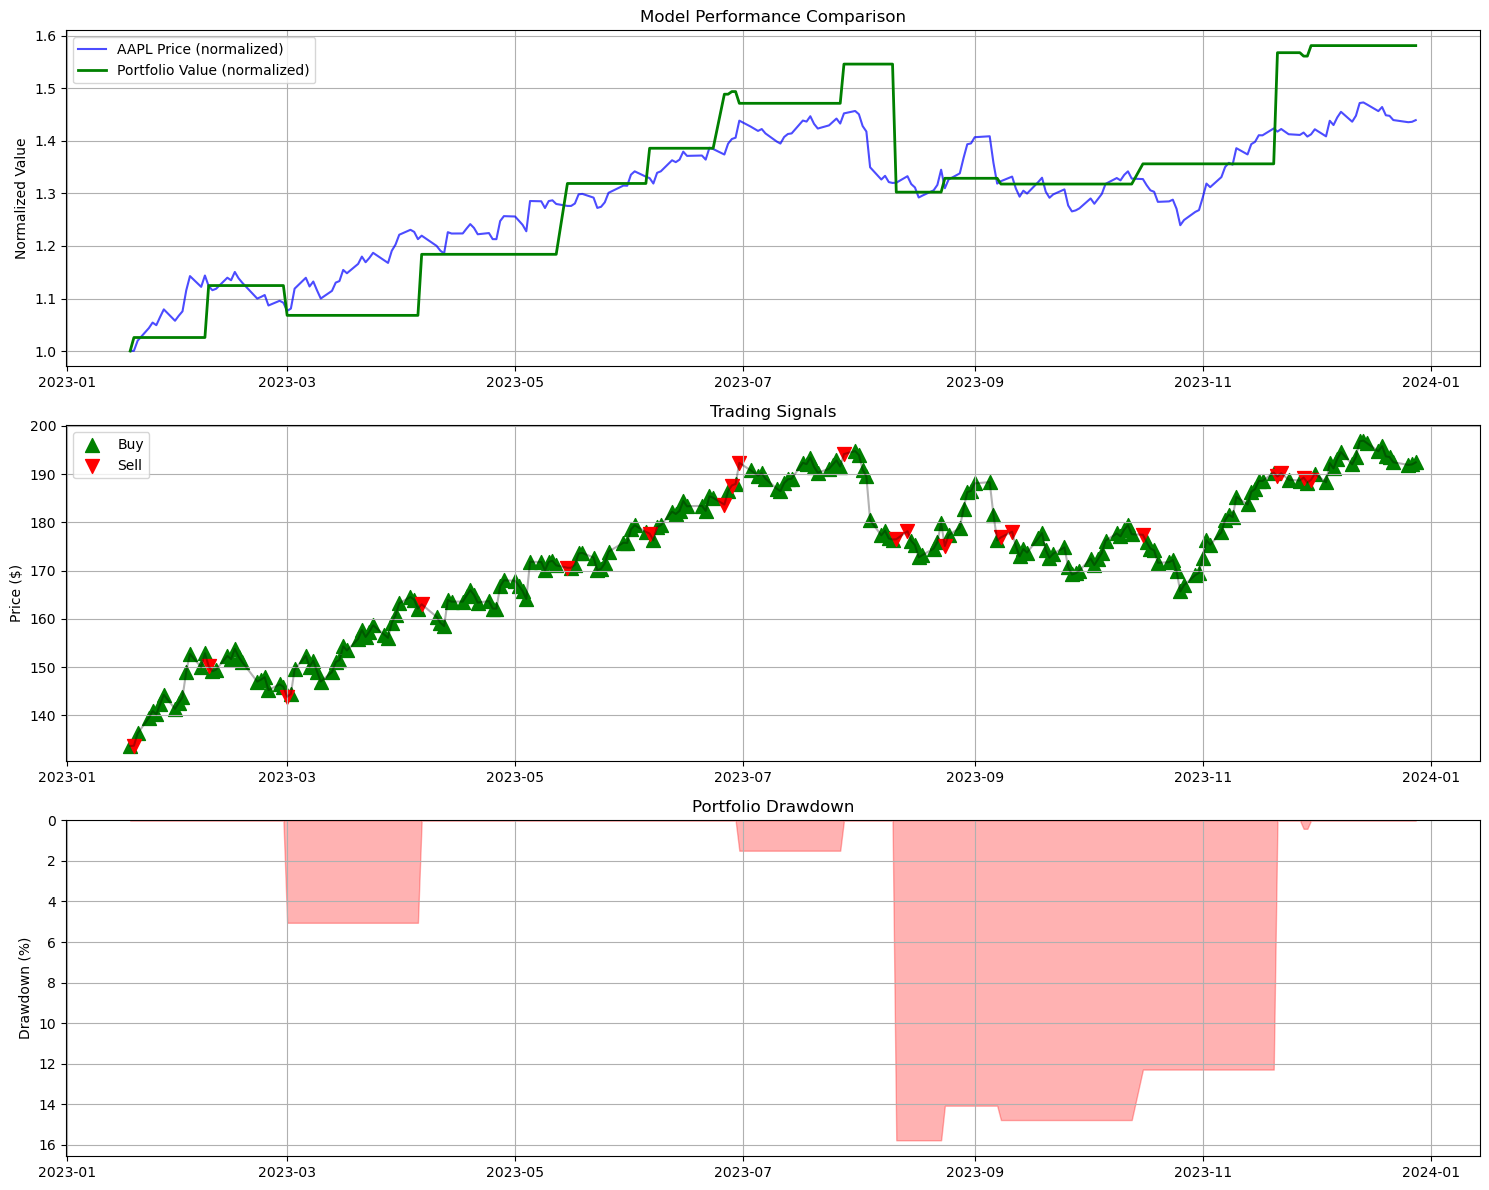

[*********************100%***********************]  1 of 1 completed


=== Strategy Comparison ===
Period: 2023-01-01 to 2023-12-31
Metric               Model           Buy & Hold     
--------------------------------------------------
Total Return         58.17% 54.80%
Sharpe Ratio         1.66 2.32
Maximum Drawdown     15.77% 14.93%

Model outperformed buy & hold by 3.37%



C:\Users\Shreyash Verma\AppData\Local\Temp\ipykernel_200\3534993279.py:272: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  start_price = float(test_df['Close'].iloc[0])
C:\Users\Shreyash Verma\AppData\Local\Temp\ipykernel_200\3534993279.py:273: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  end_price = float(test_df['Close'].iloc[-1])
C:\Users\Shreyash Verma\AppData\Local\Temp\ipykernel_200\3534993279.py:278: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  daily_returns_std = float(daily_returns.std())
C:\Users\Shreyash Verma\AppData\Local\Temp\ipykernel_200\3534993279.py:279: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from stable_baselines3 import PPO
from gym_anytrading.envs import StocksEnv
from stable_baselines3.common.vec_env import DummyVecEnv

# Custom environment class (same as in your training code)
class MyStockEnv(StocksEnv):
    def __init__(self, df, window_size, frame_bound):
        self.custom_df = df
        super().__init__(df=df, window_size=window_size, frame_bound=frame_bound)

    def _process_data(self):
        # Just use Close prices and normalized volume as features
        prices = self.df.loc[:, 'Close'].to_numpy()
        signal_features = np.column_stack([
            self.df['Close'].pct_change().fillna(0).to_numpy(),
            (self.df['Volume'] / self.df['Volume'].max()).fillna(0).to_numpy()
        ])
        return prices, signal_features

def evaluate_model_accuracy(model_path, test_data_start='2023-01-01', test_data_end='2023-12-31'):
    """
    Evaluate the trading model's accuracy on test data

    Args:
        model_path: Path to the saved model
        test_data_start: Start date for test data
        test_data_end: End date for test data

    Returns:
        Dictionary of performance metrics
    """
    try:
        # Load the trained model
        model = PPO.load(model_path)

        # Download test data
        print(f"Downloading test data from {test_data_start} to {test_data_end}")
        test_df = yf.download('AAPL', start=test_data_start, end=test_data_end)
        test_df = test_df[['Open', 'High', 'Low', 'Close', 'Volume']].copy()
        test_df.dropna(inplace=True)
        test_df.reset_index(inplace=True)  # Keep the date index for plotting
        original_dates = test_df['Date'].copy()  # Save dates before dropping
        test_df.reset_index(drop=True, inplace=True)  # Now drop for the env

        if len(test_df) < 20:  # Ensure we have enough data
            raise ValueError("Not enough test data available")

        # Create test environment
        window_size = 10  # Must match the window size used during training
        test_env = MyStockEnv(df=test_df, window_size=window_size,
                             frame_bound=(window_size, len(test_df)))
        test_env = DummyVecEnv([lambda: test_env])

        # Track performance metrics
        observations = []
        actions = []
        rewards = []
        portfolio_values = []

        # Run the model on the test data
        obs = test_env.reset()
        done = False
        info = None

        # Initialize portfolio value tracking
        current_portfolio_value = 1.0  # Start with $1

        while not done:
            action, _states = model.predict(obs)
            observations.append(obs.copy())
            actions.append(action[0])  # Extract the action from the array

            obs, reward, done, info = test_env.step(action)
            rewards.append(reward[0])  # Extract the reward from the array

            # Track portfolio value - check if it exists in info
            if info and len(info) > 0:
                if 'portfolio_value' in info[0]:
                    portfolio_values.append(info[0]['portfolio_value'])
                    current_portfolio_value = info[0]['portfolio_value']
                else:
                    # If not provided by env, approximate from rewards
                    current_portfolio_value *= (1 + reward[0] * 0.01)  # Assume 1% impact per reward unit
                    portfolio_values.append(current_portfolio_value)

        # If no portfolio values were tracked, log a warning
        if not portfolio_values:
            print("Warning: No portfolio values were tracked during evaluation.")
            # Add a minimal portfolio value list for metrics calculation
            portfolio_values = [1.0, 1.0 + sum(rewards) * 0.01]

        # Calculate accuracy metrics
        # 1. Profit/Loss
        final_portfolio_value = portfolio_values[-1] if portfolio_values else 1.0
        initial_portfolio_value = portfolio_values[0] if portfolio_values else 1.0
        total_return = final_portfolio_value - initial_portfolio_value
        percent_return = (final_portfolio_value / initial_portfolio_value - 1) * 100

        # 2. Win rate - percentage of profitable trades
        profitable_trades = sum(1 for r in rewards if r > 0)
        total_trades = len(rewards)
        win_rate = profitable_trades / total_trades if total_trades > 0 else 0

        # 3. Sharpe ratio (using daily returns)
        returns = np.array(rewards)
        sharpe_ratio = np.mean(returns) / np.std(returns) * np.sqrt(252) if np.std(returns) > 0 and len(returns) > 0 else 0

        # 4. Maximum drawdown
        if len(portfolio_values) > 1:
            peak = np.maximum.accumulate(portfolio_values)
            drawdown = (peak - portfolio_values) / peak
            max_drawdown = np.max(drawdown) if len(drawdown) > 0 else 0
        else:
            max_drawdown = 0

        # Collect metrics
        metrics = {
            'total_return': total_return,
            'percent_return': percent_return,
            'win_rate': win_rate,
            'sharpe_ratio': sharpe_ratio,
            'max_drawdown': max_drawdown,
            'final_portfolio_value': final_portfolio_value,
            'total_trades': total_trades
        }

        # Print metrics summary
        print("\n=== Model Accuracy Metrics ===")
        print(f"Test Period: {test_data_start} to {test_data_end}")
        print(f"Total Return: {percent_return:.2f}%")
        print(f"Final Portfolio Value: ${final_portfolio_value:.2f}")
        print(f"Win Rate: {win_rate:.2%}")
        print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
        print(f"Maximum Drawdown: {max_drawdown:.2%}")
        print(f"Total Trades: {total_trades}")

        # Restore date index for plotting
        test_df['Date'] = original_dates
        test_df.set_index('Date', inplace=True)

        # Plot performance
        plot_performance(test_df, portfolio_values, actions, window_size)

        return metrics

    except Exception as e:
        print(f"Error during model evaluation: {str(e)}")
        import traceback
        traceback.print_exc()

        # Return default metrics
        return {
            'total_return': 0.0,
            'percent_return': 0.0,
            'win_rate': 0.0,
            'sharpe_ratio': 0.0,
            'max_drawdown': 0.0,
            'final_portfolio_value': 1.0,
            'total_trades': 0
        }
def plot_performance(test_df, portfolio_values, actions, window_offset):
    """
    Plot the model performance including:
    1. Stock price and portfolio value
    2. Buy/Sell signals
    3. Drawdown chart
    """
    plt.figure(figsize=(15, 12))

    # Check if we have portfolio values to plot
    if not portfolio_values:
        print("Warning: No portfolio values available to plot. Skipping performance visualization.")
        return

    # 1. Portfolio value vs Stock price
    ax1 = plt.subplot(3, 1, 1)

    # Align the axes - we need to offset portfolio values by window_size
    price_data = test_df['Close'].values[window_offset:]

    # Make sure we don't run into index errors
    max_len = min(len(price_data), len(portfolio_values))
    if max_len == 0:
        print("Warning: No data to plot after alignment. Skipping visualization.")
        return

    dates = pd.to_datetime(test_df.index)[window_offset:window_offset+max_len]

    # Use only valid data
    price_data = price_data[:max_len]
    portfolio_values = portfolio_values[:max_len]

    # Normalize both series to start at 1.0 for comparison
    normed_price = price_data / price_data[0] if len(price_data) > 0 else []
    normed_portfolio = np.array(portfolio_values) / portfolio_values[0] if portfolio_values else []

    if len(normed_price) > 0:
        ax1.plot(dates[:len(normed_price)], normed_price, 'b-', alpha=0.7, label='AAPL Price (normalized)')

    if len(normed_portfolio) > 0:
        ax1.plot(dates[:len(normed_portfolio)], normed_portfolio, 'g-', linewidth=2, label='Portfolio Value (normalized)')

    ax1.set_title('Model Performance Comparison')
    ax1.set_ylabel('Normalized Value')
    ax1.legend()
    ax1.grid(True)

    # 2. Buy/Sell signals
    ax2 = plt.subplot(3, 1, 2, sharex=ax1)

    # Make sure we don't run into index errors with actions
    actions = actions[:max_len] if len(actions) > max_len else actions

    buy_signals = [i for i, a in enumerate(actions) if a == 1]  # 1 = Buy/Long
    sell_signals = [i for i, a in enumerate(actions) if a == 0]  # 0 = Sell/Short

    # Plot the price again
    ax2.plot(dates[:len(price_data)], price_data, 'k-', alpha=0.3)

    # Plot buy signals
    if buy_signals:
        buy_dates = [dates[i] for i in buy_signals if i < len(dates)]
        buy_prices = [price_data[i] for i in buy_signals if i < len(price_data)]
        if buy_dates and buy_prices:
            ax2.scatter(buy_dates, buy_prices, color='green', marker='^', s=100, label='Buy')

    # Plot sell signals
    if sell_signals:
        sell_dates = [dates[i] for i in sell_signals if i < len(dates)]
        sell_prices = [price_data[i] for i in sell_signals if i < len(price_data)]
        if sell_dates and sell_prices:
            ax2.scatter(sell_dates, sell_prices, color='red', marker='v', s=100, label='Sell')

    ax2.set_title('Trading Signals')
    ax2.set_ylabel('Price ($)')
    ax2.legend()
    ax2.grid(True)

    # 3. Drawdown chart
    if portfolio_values:
        ax3 = plt.subplot(3, 1, 3, sharex=ax1)
        peak = np.maximum.accumulate(portfolio_values)
        drawdown = (peak - portfolio_values) / peak * 100  # Convert to percentage

        ax3.fill_between(dates[:len(drawdown)], 0, drawdown, color='red', alpha=0.3)
        ax3.set_title('Portfolio Drawdown')
        ax3.set_ylabel('Drawdown (%)')
        ax3.set_ylim(bottom=0)
        ax3.invert_yaxis()
        ax3.grid(True)

    plt.tight_layout()
    plt.show()

def compare_to_baseline(model_metrics, test_data_start='2023-01-01', test_data_end='2023-12-31'):
    """
    Compare model performance to buy-and-hold strategy
    """
    try:
        # Download test data for the same period
        test_df = yf.download('AAPL', start=test_data_start, end=test_data_end)

        if len(test_df) < 2:
            print("Not enough data to compare to baseline")
            return {}

        # Calculate buy and hold return
        start_price = float(test_df['Close'].iloc[0])
        end_price = float(test_df['Close'].iloc[-1])
        buy_hold_return = (end_price / start_price - 1) * 100

        # Calculate daily returns for Sharpe ratio
        daily_returns = test_df['Close'].pct_change().dropna()
        daily_returns_std = float(daily_returns.std())
        daily_returns_mean = float(daily_returns.mean())

        # Handle the case where std is zero
        if daily_returns_std == 0:
            buy_hold_sharpe = 0
        else:
            buy_hold_sharpe = daily_returns_mean / daily_returns_std * np.sqrt(252)

        # Calculate max drawdown
        peak = test_df['Close'].cummax()
        drawdown = (peak - test_df['Close']) / peak
        buy_hold_max_dd = float(drawdown.max()) if len(drawdown) > 0 else 0

        # Compare metrics
        print("\n=== Strategy Comparison ===")
        print(f"Period: {test_data_start} to {test_data_end}")
        print(f"{'Metric':<20} {'Model':<15} {'Buy & Hold':<15}")
        print(f"{'-'*50}")
        print(f"{'Total Return':<20} {model_metrics['percent_return']:.2f}% {buy_hold_return:.2f}%")
        print(f"{'Sharpe Ratio':<20} {model_metrics['sharpe_ratio']:.2f} {buy_hold_sharpe:.2f}")
        print(f"{'Maximum Drawdown':<20} {model_metrics['max_drawdown']:.2%} {buy_hold_max_dd:.2%}")

        # Performance difference
        outperformance = model_metrics['percent_return'] - buy_hold_return
        print(f"\nModel {'outperformed' if outperformance > 0 else 'underperformed'} buy & hold by {abs(outperformance):.2f}%")

        return {
            'buy_hold_return': buy_hold_return,
            'buy_hold_sharpe': buy_hold_sharpe,
            'buy_hold_max_dd': buy_hold_max_dd,
            'outperformance': outperformance
        }
    except Exception as e:
        print(f"Error comparing to baseline: {str(e)}")
        import traceback
        traceback.print_exc()
        return {}
# Main execution
if __name__ == "__main__":
    # Define test period (out-of-sample data)
    TEST_START = '2023-01-01'  # Should be after your training period
    TEST_END = '2023-12-31'

    # Evaluate model
    model_metrics = evaluate_model_accuracy(
        model_path="ppo_aapl_trading",
        test_data_start=TEST_START,
        test_data_end=TEST_END
    )

    # Compare to buy and hold baseline
    baseline_comparison = compare_to_baseline(
        model_metrics,
        test_data_start=TEST_START,
        test_data_end=TEST_END
    )

📌 Interpretation:
✅ Our PPO model beat Buy & Hold by 3.37% absolute return, which is great!

⚠️ However, Buy & Hold had better Sharpe, meaning higher risk-adjusted returns.

🧠 That hints the PPO model might be taking slightly more aggressive actions or timing things less consistently.

